<a href="https://colab.research.google.com/github/sakshisinghal936/DA-weekday-batch/blob/main/Project_Class_26_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda : Countries/Continent performance in Sugarcane Production

KPIs : ??
1. Rank of a country in sugarcane production
2. Revenue generated by a country with sugarcane.
2. Areawise production
4. Climate factors
5. Total farmers working for sugarcane in a particular country
6. Per capita basis

Datasets :

### 1. Data Exploration

#### 1.1) Loading the Dataset

In [88]:
import pandas as pd
df = pd.read_csv("/content/List of Countries by Sugarcane Production.csv")

df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


In [89]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [90]:
df.tail(4)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"
102,102,Syria,Asia,1,0,0,"83.034,2"


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [92]:
df.shape

(103, 7)

In [93]:
df.columns

Index(['Unnamed: 0', 'Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

In [94]:
df.dtypes

,0
Unnamed: 0,int64
Country,object
Continent,object
Production (Tons),object
Production per Person (Kg),object
Acreage (Hectare),object
Yield (Kg / Hectare),object


In [95]:
df.describe()

,Unnamed: 0
count,103.000000
mean,51.000000
std,29.877528
min,0.000000
25%,25.500000
50%,51.000000
75%,76.500000
max,102.000000


In [96]:
df[df["Country"]=="India"]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"


In [97]:
df[df["Country"]=="Pakistan"]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [98]:
df[df["Continent"]=="Asia"].shape

(25, 7)

#### 1.2) Checking Duplicates

In [99]:
df.duplicated().sum()

0

In [100]:
df["Country"].duplicated().sum()

0

In [101]:
df["Continent"].duplicated().sum()

97

#### 1.3) Checking Null Values

In [102]:
df.isnull().sum()

,0
Unnamed: 0,0
Country,0
Continent,0
Production (Tons),0
Production per Person (Kg),0
Acreage (Hectare),1
Yield (Kg / Hectare),1


In [103]:
df.isna().sum()

,0
Unnamed: 0,0
Country,0
Continent,0
Production (Tons),0
Production per Person (Kg),0
Acreage (Hectare),1
Yield (Kg / Hectare),1


In [104]:
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [105]:
df.shape

(103, 7)

#### 1.4) Exploring each column one by one

In [106]:
set(df["Continent"].values)

{'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'}

In [107]:
df["Continent"].unique()

array(['South America', 'Asia', 'North America', 'Oceania', 'Africa',
       'Europe'], dtype=object)

In [108]:
df["Continent"].nunique()

6

In [109]:
  df["Continent"].value_counts()

,count
Continent,
Africa,39
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


### 2. Data Cleaning

#### 2.1) Remove Duplicates

In [110]:
df.drop_duplicates(keep = False)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


#### 2.2) Remove Null

In [111]:
df = df.dropna()

In [112]:
df_nullfilled = df.fillna("")
df_nullfilled

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,"43.596,5"
98,98,Lebanon,Asia,97,16,3,"28.386,4"
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


#### 2.3) Cleaning and Removing Unnecessary Columns

In [113]:
"SakshiSinghal".replace("a","@")

'S@kshiSingh@l'

In [114]:
df.head(2)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"


In [115]:
df.rename(columns = {"Production (Tons)":"Production_tons"}, inplace = True)
df.rename(columns = {"Production per Person (Kg)":"Production_per_person_kg"}, inplace = True)
df.rename(columns = {"Acreage (Hectare)":"Acreage_Hectare"}, inplace = True)
df.rename(columns = {"Yield (Kg / Hectare)":"Yield_kg/hectare"}, inplace = True)

<ipython-input-115-b9b8de44a8de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {"Production (Tons)":"Production_tons"}, inplace = True)
<ipython-input-115-b9b8de44a8de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {"Production per Person (Kg)":"Production_per_person_kg"}, inplace = True)
<ipython-input-115-b9b8de44a8de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {

In [116]:
df.head()

,Unnamed: 0,Country,Continent,Production_tons,Production_per_person_kg,Acreage_Hectare,Yield_kg/hectare
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [117]:
df["Production_tons"] = df["Production_tons"].str.replace(".","").astype(float)

<ipython-input-117-1b971ad3c502>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Production_tons"] = df["Production_tons"].str.replace(".","").astype(float)


In [118]:
df["Production_per_person_kg"] = df["Production_per_person_kg"].str.replace(".","").str.replace(",",".").astype(float)

<ipython-input-118-67a85501d331>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Production_per_person_kg"] = df["Production_per_person_kg"].str.replace(".","").str.replace(",",".").astype(float)


In [119]:
df["Acreage_Hectare"] = df["Acreage_Hectare"].str.replace(".","").astype(float)
df["Yield_kg/hectare"] = df["Yield_kg/hectare"].str.replace(".","").str.replace(",",".").astype(float)

<ipython-input-119-4677bc3aca44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Acreage_Hectare"] = df["Acreage_Hectare"].str.replace(".","").astype(float)
<ipython-input-119-4677bc3aca44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Yield_kg/hectare"] = df["Yield_kg/hectare"].str.replace(".","").str.replace(",",".").astype(float)


In [120]:
df.describe()

,Unnamed: 0,Production_tons,Production_per_person_kg,Acreage_Hectare,Yield_kg/hectare
count,102.000000,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,50.529412,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,29.638985,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,0.000000,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,25.250000,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,50.500000,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,75.750000,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,102.000000,7.686784e+08,951087.000000,1.022620e+07,129049.300000


In [121]:
df[df["Continent"] != "Asia"]

,Unnamed: 0,Country,Continent,Production_tons,Production_per_person_kg,Acreage_Hectare,Yield_kg/hectare
0,0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
5,5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5
7,7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
...,...,...,...,...,...,...,...
92,92,Portugal,Europe,5429.0,528.000,62.0,88274.4
93,93,Antigua and Barbuda,North America,5365.0,6217.000,83.0,64638.6
94,94,Dominica,North America,4855.0,68099.000,244.0,19914.4
97,97,Spain,Europe,394.0,8.000,9.0,43596.5


In [122]:
df = df.drop("Unnamed: 0",axis = 1)

In [123]:
df.sort_values("Continent", ascending = False )

,Country,Continent,Production_tons,Production_per_person_kg,Acreage_Hectare,Yield_kg/hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
12,Argentina,South America,21990823.0,494237.000,331699.0,66297.5
37,Venezuela,South America,3331252.0,104664.000,5223.0,63780.4
25,Paraguay,South America,6708000.0,951087.000,120.0,559.0
43,Guyana,South America,2394553.0,3061.207,44311.0,54039.7
...,...,...,...,...,...,...
54,Cameroon,Africa,1288732.0,54162.000,135984.0,9477.1
76,Central African Republic,Africa,103002.0,21742.000,18466.0,5577.8
53,Nigeria,Africa,1337572.0,6776.000,82586.0,16196.1
78,Rwanda,Africa,93823.0,7818.000,1103.0,8506.3


### 3. Data Analysis

#### 3.1) KPIS
### Countries
1. Smallest/Highest production of sugarcane countrywise.
2. Top 10 countries producing sugarcane.
3. Smallest/Highest land for sugarcane production countrywise.
4. Relation between Acreage_Hectare & Production_Tons.
5. Which country produce large amount of sugarcane per hectare.
6. Boxplot showing all numerical columns to check in any case any country's performance is outlier.

### Continent
1. Smallest/Highest production of sugarcane continentwise.
2. Top 2 continents producing sugarcane.
3. How many countries are producing sugarcane in a continent? Does it effect sugarcane production?
4. Relation between number of countries and sugarcane production.




### 3.2) Analysis and Visualization using Pandas library

In [124]:
df.head()

,Country,Continent,Production_tons,Production_per_person_kg,Acreage_Hectare,Yield_kg/hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [125]:
df[df["Production_tons"]==df["Production_tons"].max()]["Country"].values

array(['Brazil'], dtype=object)

In [126]:
df[df["Production_tons"]==df["Production_tons"].min()]["Country"].values

array(['Syria'], dtype=object)

In [127]:
df.sort_values("Production_tons", ascending = False).head(10)["Country"].values

array(['Brazil', 'India', 'China', 'Thailand', 'Pakistan', 'Mexico',
       'Colombia', 'Australia', 'Guatemala', 'United States of America'],
      dtype=object)

<Axes: xlabel='Country'>

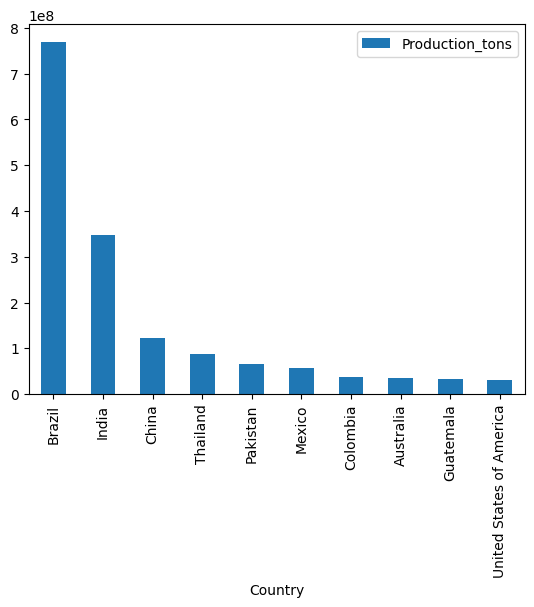

In [128]:
df.sort_values("Production_tons", ascending = False).head(10)[["Country", "Production_tons"]].set_index("Country").plot(kind = "bar")

<Axes: ylabel='Production_tons'>

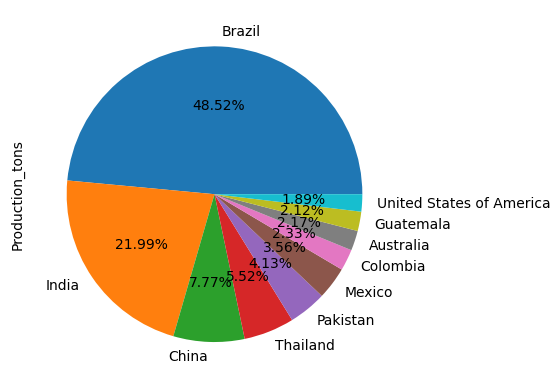

In [129]:
df.sort_values("Production_tons", ascending = False).head(10)[["Country", "Production_tons"]].set_index("Country")["Production_tons"].plot(kind = "pie", autopct = "%.2f%%")

<Axes: xlabel='Country'>

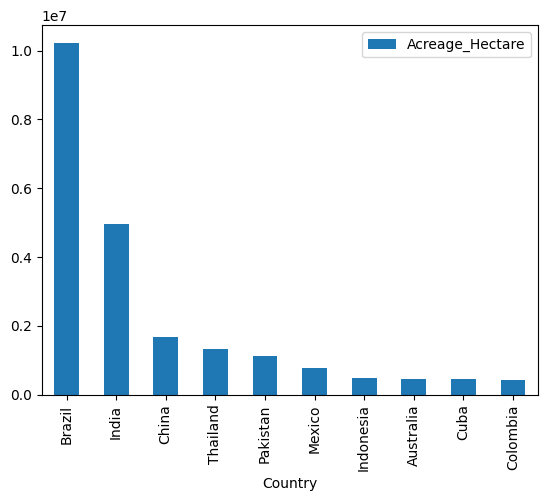

In [130]:
df.sort_values("Acreage_Hectare", ascending = False).head(10)[["Country", "Acreage_Hectare"]].set_index("Country").plot(kind = "bar")

In [131]:
df[["Acreage_Hectare", "Production_tons"]].corr()

,Acreage_Hectare,Production_tons
Acreage_Hectare,1.00000,0.99755
Production_tons,0.99755,1.00000


In [132]:
df[["Production_per_person_kg","Production_tons"]].corr()

,Production_per_person_kg,Production_tons
Production_per_person_kg,1.000,0.015
Production_tons,0.015,1.000


In [133]:
df[["Production_per_person_kg" ,"Production_tons","Acreage_Hectare", "Yield_kg/hectare"]].corr()

,Production_per_person_kg,Production_tons,Acreage_Hectare,Yield_kg/hectare
Production_per_person_kg,1.000000,0.015000,0.012557,0.017999
Production_tons,0.015000,1.000000,0.997550,0.132812
Acreage_Hectare,0.012557,0.997550,1.000000,0.113433
Yield_kg/hectare,0.017999,0.132812,0.113433,1.000000


<Axes: ylabel='count'>

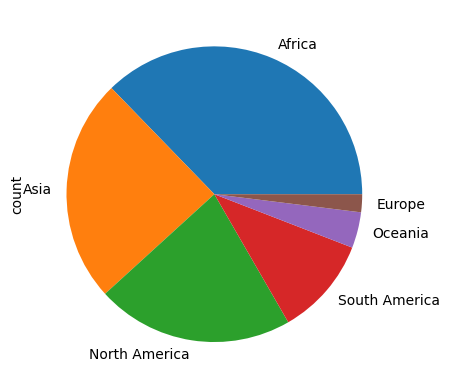

In [134]:
df["Continent"].value_counts().plot(kind = "pie")

In [135]:
df.head(10)

,Country,Continent,Production_tons,Production_per_person_kg,Acreage_Hectare,Yield_kg/hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
9,United States of America,North America,29926210.0,91304.000,37053.0,80766.0


In [136]:
df_continent = df.groupby("Continent").sum()

In [137]:
df_continent

,Country,Production_tons,Production_per_person_kg,Acreage_Hectare,Yield_kg/hectare
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [138]:
df_continent["Number_of_countries"] = df["Continent"].value_counts()

In [139]:
df_continent

,Country,Production_tons,Production_per_person_kg,Acreage_Hectare,Yield_kg/hectare,Number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


In [140]:
df_continent.drop("Country", axis = 1, inplace = True)

In [141]:
df_continent

,Production_tons,Production_per_person_kg,Acreage_Hectare,Yield_kg/hectare,Number_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


In [142]:
df_continent["Production_per_person_kg"] =df_continent["Production_per_person_kg"] /df_continent["Number_of_countries"]
df_continent["Yield_kg/hectare"] =df_continent["Yield_kg/hectare"] /df_continent["Number_of_countries"]

In [143]:
df_continent

,Production_tons,Production_per_person_kg,Acreage_Hectare,Yield_kg/hectare,Number_of_countries
Continent,,,,,
Africa,89681472.0,61385.165605,1439089.0,56371.250000,38
Asia,721930425.0,74310.772120,10608319.0,46874.856000,25
Europe,5823.0,268.000000,71.0,65935.450000,2
North America,173995947.0,172549.159455,1581983.0,49209.200000,22
Oceania,36177574.0,7148.401250,490909.0,40604.775000,4
South America,865588126.0,318684.703455,11369236.0,61562.972727,11


### 3.2) Visualization using matplotlib

In [144]:
import matplotlib.pyplot as plt

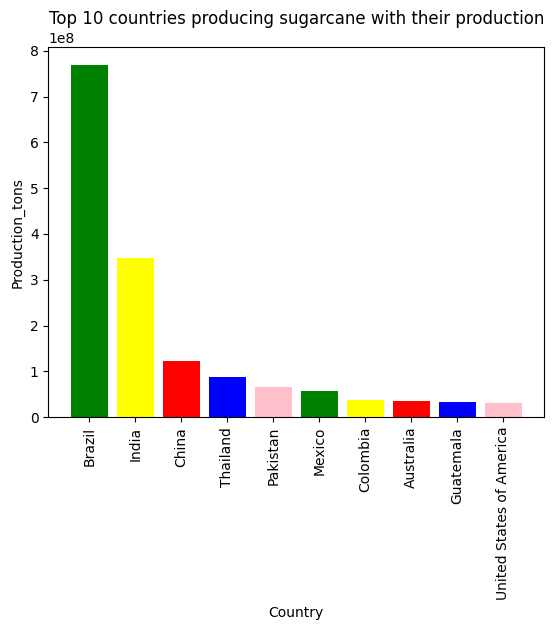

In [155]:
df_sorted = df.sort_values("Production_tons", ascending = False)
plt.bar(df_sorted["Country"].head(10),df_sorted["Production_tons"].head(10),color = ["green", "yellow", "red", "blue", "pink"])
plt.xticks(rotation = 90)
plt.title("Top 10 countries producing sugarcane with their production")
plt.xlabel("Country")
plt.ylabel("Production_tons")
plt.show()

Brazil is producing maximum sugarcane. And the second country is India and it is producing half of the amount Brazil is producing.

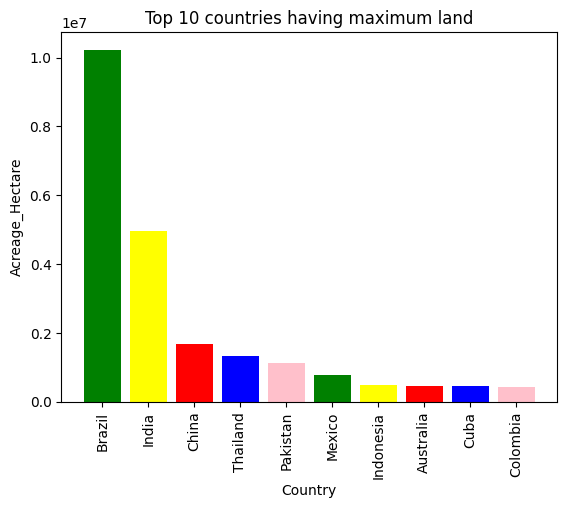

In [156]:
df_sorted = df.sort_values("Acreage_Hectare", ascending = False)
plt.bar(df_sorted["Country"].head(10),df_sorted["Acreage_Hectare"].head(10),color = ["green", "yellow", "red", "blue", "pink"])
plt.xticks(rotation = 90)
plt.title("Top 10 countries having maximum land")
plt.xlabel("Country")
plt.ylabel("Acreage_Hectare")
plt.show()

In [160]:
corr_matrix = df[["Production_tons","Production_per_person_kg", "Acreage_Hectare","Yield_kg/hectare"]].corr()

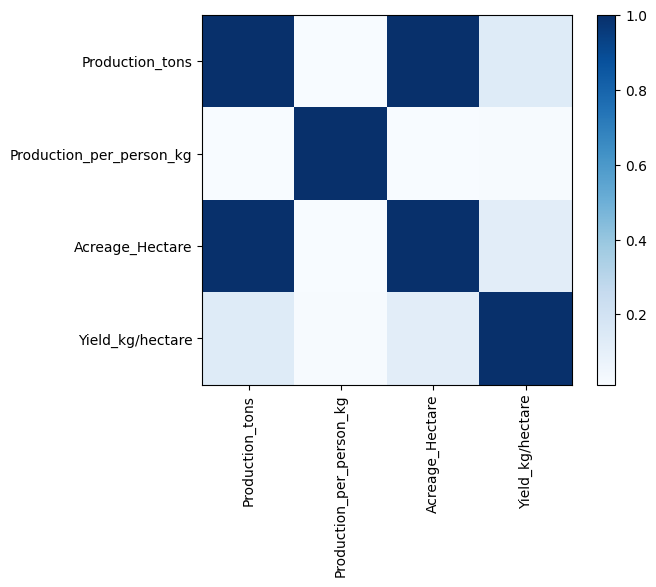

In [177]:
plt.imshow(corr_matrix, cmap = "Blues")
plt.colorbar()
plt.xticks(ticks= [0,1,2,3], labels= ["Production_tons","Production_per_person_kg", "Acreage_Hectare","Yield_kg/hectare"],rotation = 90)
plt.yticks(ticks= [0,1,2,3], labels= ["Production_tons","Production_per_person_kg", "Acreage_Hectare","Yield_kg/hectare"])
plt.show()

In [145]:
df.head()

,Country,Continent,Production_tons,Production_per_person_kg,Acreage_Hectare,Yield_kg/hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


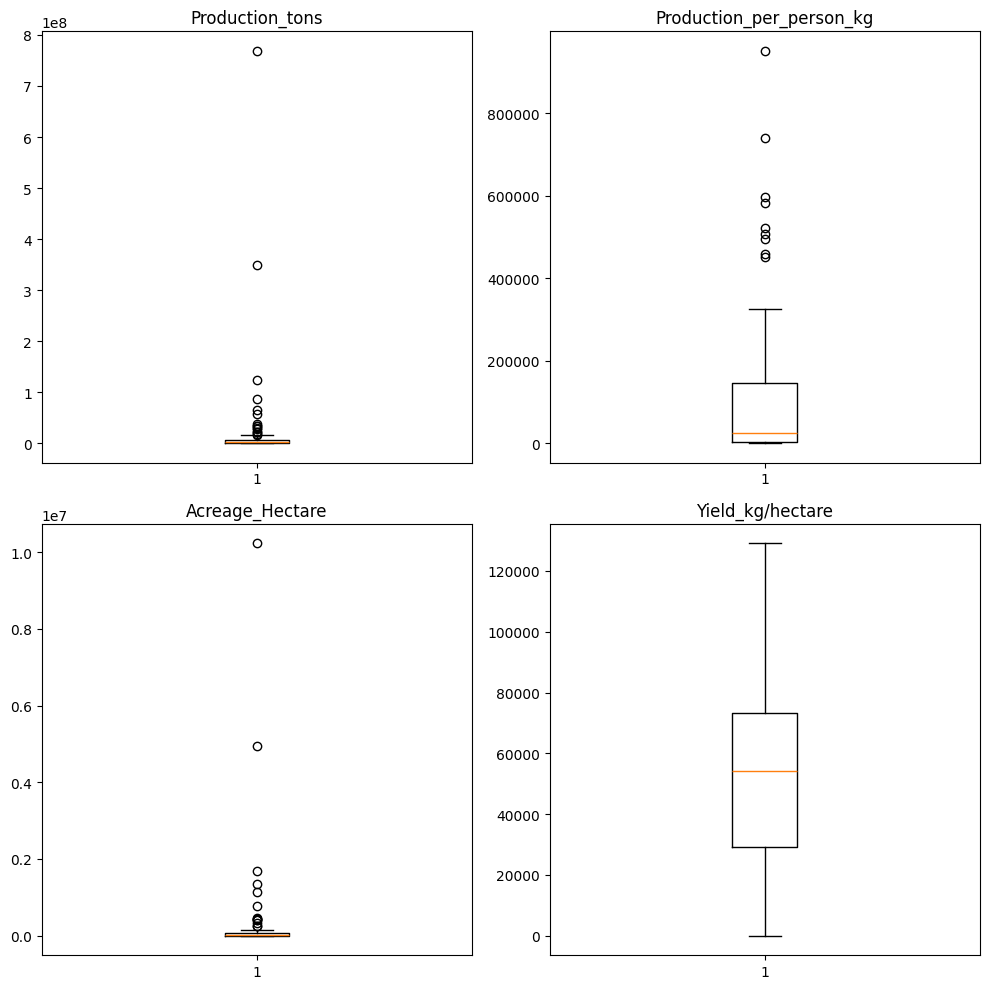

In [178]:
fig, axs = plt.subplots(2,2, figsize = (10,10))

axs[0,0].boxplot(df["Production_tons"])
axs[0,0].set_title("Production_tons")

axs[0,1].boxplot(df["Production_per_person_kg"])
axs[0,1].set_title("Production_per_person_kg")


axs[1,0].boxplot(df["Acreage_Hectare"])
axs[1,0].set_title("Acreage_Hectare")

axs[1,1].boxplot(df["Yield_kg/hectare"])
axs[1,1].set_title("Yield_kg/hectare")


plt.tight_layout()
plt.show()

# To do list
## Sugarcane Project Complete
## Seaborn
## Job analysis